In [49]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Wczytanie Danych

## Zbiór framingham.csv

In [50]:
fram = pd.read_csv("./datasets/framingham.csv")
fram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [51]:
fram = fram.fillna(fram.median())

Brakujące dane zostały tutaj uzupełnione medianą danej cechy.

In [52]:
fram.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.979471,0.494101,8.941482,0.029259,0.005899,0.310524,0.025720,236.689476,132.352407,82.893464,25.800205,75.878716,81.603587,0.151958
std,0.495022,8.572160,1.007081,0.500024,11.902399,0.168552,0.076587,0.462763,0.158316,44.327427,22.038097,11.910850,4.071041,12.025185,22.865246,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


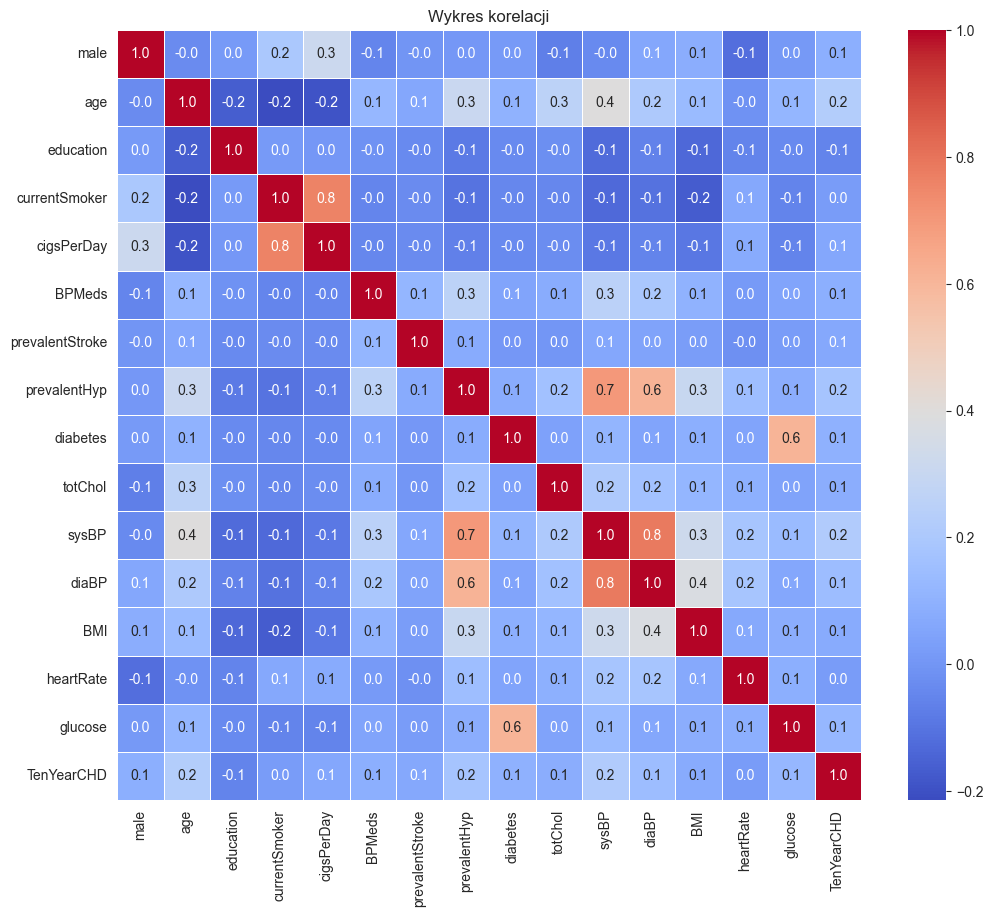

In [53]:
plt.figure(figsize=(12,10))
corr_matrix = fram.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title("Wykres korelacji")
plt.show()

# 2. Selekcja zmiennych

## Ręczna selekcja zmiennych.

In [54]:
m1 = sm.OLS(fram['TenYearCHD'], sm.add_constant(fram.drop('TenYearCHD', axis=1))).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     30.31
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           9.97e-83
Time:                        10:54:06   Log-Likelihood:                -1454.9
No. Observations:                4238   AIC:                             2942.
Df Residuals:                    4222   BIC:                             3044.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5592      0.074     

In [55]:
m2 = sm.OLS(fram['TenYearCHD'], sm.add_constant(fram.drop(['TenYearCHD', 'BMI'], axis=1))).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     32.48
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           1.75e-83
Time:                        10:54:06   Log-Likelihood:                -1455.0
No. Observations:                4238   AIC:                             2940.
Df Residuals:                    4223   BIC:                             3035.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5640      0.070     

In [56]:
m3 = sm.OLS(fram['TenYearCHD'], sm.add_constant(fram.drop(['TenYearCHD', 'BMI', 'currentSmoker'], axis=1))).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     34.99
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           2.89e-84
Time:                        10:54:06   Log-Likelihood:                -1455.0
No. Observations:                4238   AIC:                             2938.
Df Residuals:                    4224   BIC:                             3027.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5641      0.069     

In [57]:
m4 = sm.OLS(fram['TenYearCHD'], sm.add_constant(fram.drop(['TenYearCHD', 'BMI', 'currentSmoker', 'diabetes'], axis=1))).fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     37.80
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           8.48e-85
Time:                        10:54:06   Log-Likelihood:                -1455.6
No. Observations:                4238   AIC:                             2937.
Df Residuals:                    4225   BIC:                             3020.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5794      0.068     

In [58]:
m5 = sm.OLS(fram['TenYearCHD'], sm.add_constant(fram.drop(['TenYearCHD', 'BMI', 'currentSmoker', 'diabetes', 'heartRate'], axis=1))).fit()
print(m5.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     41.23
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           1.40e-85
Time:                        10:54:06   Log-Likelihood:                -1455.7
No. Observations:                4238   AIC:                             2935.
Df Residuals:                    4226   BIC:                             3012.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5906      0.062     

In [59]:
m6 = sm.OLS(fram['TenYearCHD'], sm.add_constant(fram.drop(['TenYearCHD', 'BMI', 'currentSmoker', 'diabetes', 'heartRate', 'totChol'], axis=1))).fit()
print(m6.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     45.31
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           2.55e-86
Time:                        10:54:06   Log-Likelihood:                -1455.9
No. Observations:                4238   AIC:                             2934.
Df Residuals:                    4227   BIC:                             3004.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5788      0.059     

In [60]:
m7 = sm.OLS(fram['TenYearCHD'], sm.add_constant(fram.drop(['TenYearCHD', 'BMI', 'currentSmoker', 'diabetes', 'heartRate', 'totChol', 'education'], axis=1))).fit()
print(m7.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     50.35
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           3.63e-87
Time:                        10:54:06   Log-Likelihood:                -1456.0
No. Observations:                4238   AIC:                             2932.
Df Residuals:                    4228   BIC:                             2995.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5837      0.057    -

In [61]:
m8 = sm.OLS(fram['TenYearCHD'], sm.add_constant(fram.drop(['TenYearCHD', 'BMI', 'currentSmoker', 'diabetes', 'heartRate', 'totChol', 'education', 'BPMeds'], axis=1))).fit()
print(m8.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     56.24
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           2.02e-87
Time:                        10:54:06   Log-Likelihood:                -1457.4
No. Observations:                4238   AIC:                             2933.
Df Residuals:                    4229   BIC:                             2990.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5904      0.057    -

In [62]:
m9 = sm.OLS(fram['TenYearCHD'], sm.add_constant(fram.drop(['TenYearCHD', 'BMI', 'currentSmoker', 'diabetes', 'heartRate', 'totChol', 'education', 'BPMeds', 'diaBP'], axis=1))).fit()
print(m9.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     63.99
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           6.30e-88
Time:                        10:54:06   Log-Likelihood:                -1458.4
No. Observations:                4238   AIC:                             2933.
Df Residuals:                    4230   BIC:                             2984.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6301      0.049    -

In [63]:
m10 = sm.OLS(fram['TenYearCHD'], sm.add_constant(fram.drop(['TenYearCHD', 'BMI', 'currentSmoker', 'diabetes', 'heartRate', 'totChol', 'education', 'BPMeds', 'diaBP', 'prevalentHyp'], axis=1))).fit()
print(m10.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     74.09
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           3.36e-88
Time:                        10:54:06   Log-Likelihood:                -1460.0
No. Observations:                4238   AIC:                             2934.
Df Residuals:                    4231   BIC:                             2978.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6775      0.041    -

In [64]:
print("R-squared dla modelu m1: ", m1.rsquared)
print("R-squared adjusted dla modelu m1: ", m1.rsquared_adj)
print("R-squared dla modelu m10: ", m10.rsquared)
print("R-squared adjusted dla modelu m10: ", m10.rsquared_adj)

R-squared dla modelu m1:  0.0972300708355146
R-squared adjusted dla modelu m1:  0.0940226930672845
R-squared dla modelu m10:  0.09507251021958518
R-squared adjusted dla modelu m10:  0.09378922850399007


Do f-testu mamy dwie hipotezy:

H0: modele są podobne

H1: istnieje istotna różnica pomiędzy modelami

In [65]:
f,p_value,_ = m1.compare_f_test(m10)
print(p_value)

0.3435189096926462


Jeżeli p-value < 0.05 wtedy odrzucamy h0. W naszym przypadku p-value jest większe. Z tego względu nie możemy odrzucić h0, czyli model mniejszy przewiduje podobnie dobrze jak model większy, ale ma mniej zmiennych, czyli powinien liczyć szybciej.

Ogólny wniosek jest taki że udało się zbudować model niegorszy niż pierwotny, mający dużo mniej zmiennych, zatem prawdopodobnie wiele szybszy niż pierwotny. Niemniej jego stworzenie było czasochłonne, ze względu na liczbę zmiennych i liczbę stworzonych modeli przejściowych.

## Zachłanna minimalizacja w przód i w tył

In [66]:
X = fram.drop('TenYearCHD',axis=1)
y = fram['TenYearCHD']
model = linear_model.LinearRegression()
sfs = SequentialFeatureSelector(model,
                                k_features='best',
                                forward=True,
                                scoring='neg_mean_squared_error',
                                cv=10)
sfs.fit(X, y)
selected_features = list(X.columns[list(sfs.k_feature_idx_)])

X_selected = sm.add_constant(X[selected_features])
model = sm.OLS(y, X_selected)
wprzod = model.fit()

print(wprzod.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     63.99
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           6.30e-88
Time:                        10:54:11   Log-Likelihood:                -1458.4
No. Observations:                4238   AIC:                             2933.
Df Residuals:                    4230   BIC:                             2984.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6301      0.049    -

In [67]:
X = fram.drop('TenYearCHD',axis=1)
y = fram['TenYearCHD']
model = linear_model.LinearRegression()
sfs = SequentialFeatureSelector(model,
                                k_features='best',
                                forward=False,
                                scoring='neg_mean_squared_error',
                                cv=10)
sfs.fit(X, y)
selected_features = list(X.columns[list(sfs.k_feature_idx_)])

X_selected = sm.add_constant(X[selected_features])
model = sm.OLS(y, X_selected)
wtyl = model.fit()

print(wtyl.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     63.99
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           6.30e-88
Time:                        10:54:16   Log-Likelihood:                -1458.4
No. Observations:                4238   AIC:                             2933.
Df Residuals:                    4230   BIC:                             2984.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6301      0.049    -

In [68]:
f,p_value,_ = m1.compare_f_test(wprzod)
print(p_value)

0.5457206184268851


In [69]:
f,p_value,_ = m1.compare_f_test(wtyl)
print(p_value)

0.5457206184268851


Porównując otrzymane wyniki zachłannej minimalizacji w przód oraz w tył z wcześniej stworzonym modelem m1 otrzymaliśmy następujące wyniki:

P-value w przód: 0.7066033311090913

P-value w tył: 0.7066033311090913

Co oznacza, że w przypadku obu modeli nie ma podstaw do odrzucenia hipotezy H0. (model nie jest gorszy niż m1).

Wnioskować można, że model uzyskany przez zachłanną minimalizację dał w tym wypadku lepsze wyniki. Model ręcznego wyboru zmiennych posiada co prawda mniej zmiennych (6), lecz wartość P-value w F-teście była dwukrotnie niższa.

## PCA

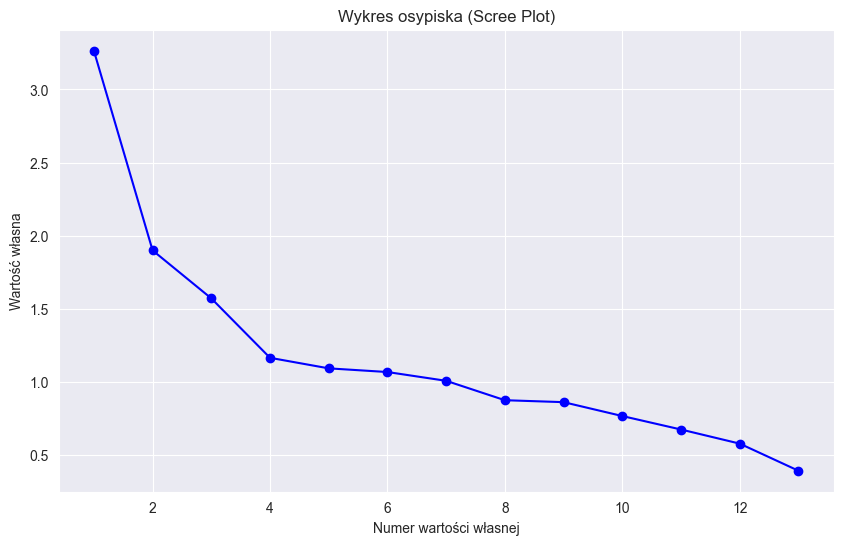

In [70]:
scaler = StandardScaler()
fram_scaled = scaler.fit_transform(fram)

pca = PCA()
pca.fit(fram_scaled)

wariancja = pca.explained_variance_ratio_
calkowita_wariancja = wariancja.cumsum()

n_components = np.argmax(calkowita_wariancja >= 0.95) + 1 # wybor maksymalnej liczby nowych zmiennych
pca = PCA(n_components=n_components)

X_pca = pca.fit_transform(fram_scaled)
X_pca_with_const = sm.add_constant(X_pca)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='-', color='b')
plt.title('Wykres osypiska (Scree Plot)')
plt.xlabel('Numer wartości własnej')
plt.ylabel('Wartość własna')
plt.show()

Na powyższym wykresie widać, że ostatni większy spadek jest między 3 a 4. 

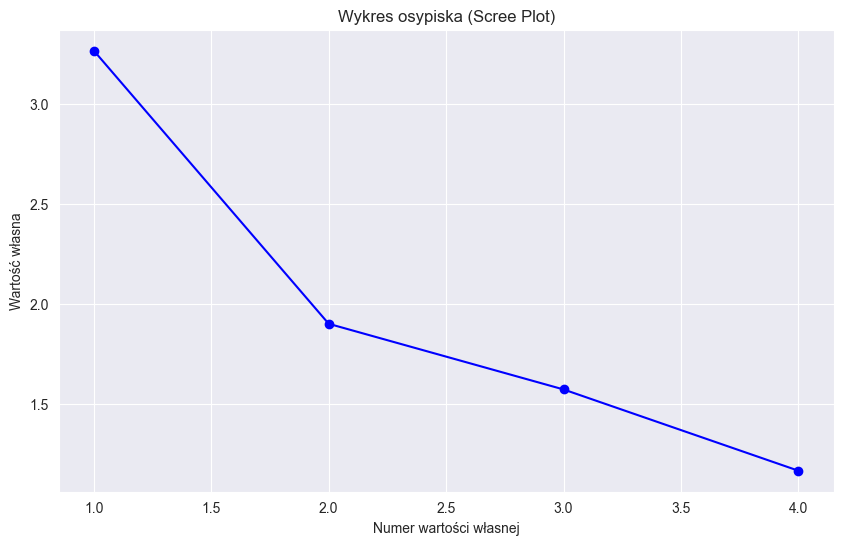

In [71]:
n_components = 4 # wybor maksymalnej liczby nowych zmiennych
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(fram_scaled)

X_pca_with_const1 = sm.add_constant(X_pca)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='-', color='b')
plt.title('Wykres osypiska (Scree Plot)')
plt.xlabel('Numer wartości własnej')
plt.ylabel('Wartość własna')
plt.show()

In [72]:
model = sm.OLS(fram['TenYearCHD'], X_pca_with_const1)
pca = model.fit()
print(pca.summary())

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     536.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:54:17   Log-Likelihood:                -802.37
No. Observations:                4238   AIC:                             1615.
Df Residuals:                    4233   BIC:                             1647.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1520      0.004     33.811      0.0

In [73]:
f,p_value,_ = m1.compare_f_test(pca)
print(p_value)

1.0


Wykonując f-test dla pca oraz modelu m1, można stwierdzić, że nie ma podstaw do odrzucenia hipotezy H0.


# 3. Podsumowanie

Podsumowując, w przypadku tego zbioru danych, metoda ręcznej selekcji dała najgorsze rezultaty, wymagała dużo kodu oraz poświęconego czasu na analizę, które zmienne należy usunąć. Zachłanna minimalizacja w przypadkach w przód oraz w tył dała taki sam model, który okazał się lepszy od modelu ręcznej selekcji zmiennych, lecz zawierał więcej zmiennych. W przypadku tego zbioru danych metoda PCA dała najlepsze rezultaty przy najmniejszej ilości zmiennych zależnych.